## SCRAPING SITO DEL CENTRO RICERCA CRS4

* **DALLA HOME CERCO LA LISTA DI PAGINE DEL SITO COLLEGATE**
* **SCARICO IL CONTENUTO ULITE; CIOè SOLO IL TESTO DI TUTTE LE PAGINE**
* **PULIZIA DEI TESTI + PAROLE FREQ**

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import urllib.request
import validators
from tqdm import tqdm

In [2]:
url = "https://www.crs4.it/"
response=requests.get(url)
print(response)
soup = BeautifulSoup(response.text, "html.parser")

print(soup.title.string)

<Response [200]>
CRS4 | center for advanced studies, research and development in sardinia


In [3]:
lista_url=[]
for link in soup.findAll("a"):
    lista_url.append(link.get("href"))
    
lista_url=list(set(lista_url))
lista_url

['https://www.crs4.it/it/',
 'https://www.crs4.it/multimedia/media-kit/',
 'https://www.crs4.it/research/computational-infrastructure-and-smart-projects/',
 'https://www.crs4.it/30years/',
 'https://www.crs4.it/research/',
 'https://www.crs4.it/about/organization-chart/',
 'https://www.crs4.it/30years/achievements/',
 'https://www.crs4.it/',
 'https://www.crs4.it/30years/pressreview/',
 'https://www.sardegnaricerche.it/',
 'https://www.crs4.it/30years/sponsors/',
 'https://www.crs4.it/news_category/news/',
 'http://jobs.crs4.it',
 'https://www.crs4.it/research/energy-and-environment/',
 'https://www.crs4.it/research/visual-and-data-intensive-computing/',
 'https://www.crs4.it/news-view/intense-project-online-event-the-crs4-contribution-to-sustainable-tourism/',
 'https://www.crs4.it/news-view/the-region-of-sardinia-sardegna-ricerche-and-crs4-are-partners-of-an-inclusion-project-for-deaf-people-and-people-with-hearing-loss/',
 'https://www.crs4.it/research/information-society/',
 'https

In [4]:
res = [] 
for val in lista_url: 
    if val != None : 
        res.append(val)
        
lista_url2 = list(filter(lambda x: x.startswith('https://www.crs4.it'), res))
lista_url2=list(set(lista_url2))
lista_url2

['https://www.crs4.it/about/organization/',
 'https://www.crs4.it/tenders/',
 'https://www.crs4.it/news-view/crs4-takes-part-in-the-webinar-entitled-the-ecosystem-of-innovation-in-sardinia/',
 'https://www.crs4.it/30years/ourhistory/',
 'https://www.crs4.it/it/trasparente/',
 'https://www.crs4.it/results/technology-catalogue/',
 'https://www.crs4.it/results/awards/',
 'https://www.crs4.it/results/projects/',
 'https://www.crs4.it/vic/multimedia/',
 'https://www.crs4.it/mprojects/projects/',
 'https://www.crs4.it/events/',
 'https://www.crs4.it/it/',
 'https://www.crs4.it/people/',
 'https://www.crs4.it/it/modello-organizzativo-231/',
 'https://www.crs4.it/events_category/past-scientific-school/',
 'https://www.crs4.it//',
 'https://www.crs4.it/press-release/',
 'https://www.crs4.it/news-view/crs4-participates-in-the-webinar-a-sustainable-mobility-for-green-territories/',
 'https://www.crs4.it/customers/',
 'https://www.crs4.it/multimedia/media-kit/',
 'https://www.crs4.it/research/comp

In [5]:
lista_url3=[x for x in lista_url2 if 'https://www.crs4.it/research/' in x]
lista_url3

['https://www.crs4.it/research/computational-infrastructure-and-smart-projects/',
 'https://www.crs4.it/research/',
 'https://www.crs4.it/research/digital-technologies-for-aerospace/',
 'https://www.crs4.it/research/visual-and-data-intensive-computing/',
 'https://www.crs4.it/research/energy-and-environment/',
 'https://www.crs4.it/research/information-society/',
 'https://www.crs4.it/research/biosciences/']

In [6]:
texts = []
title= []
for url in lista_url3[:]:
    res = requests.get(url)
    soup_l = BeautifulSoup(res.text, "html.parser")
    title.append(soup_l.title.string)
    content_l=soup_l.find('div',{"class":"row"})
    content_l=content_l.get_text()
    texts.append(content_l)
    
title

['Computational Infrastructure and Smart Projects  |  CRS4',
 'Research  |  CRS4',
 'Digital Technologies for Aerospace  |  CRS4',
 'Visual and Data-Intensive Computing  |  CRS4',
 'HPC for Energy and Environment  |  CRS4',
 'ICT – Information Society  |  CRS4',
 'Biosciences  |  CRS4']

In [7]:
texts[1]

'\n\n\n\n\n\n                                \r\n\t\t\t\t\t\t\t\t\xa0English \n\xa0Italiano (Italian)\n\n\n \n\n\n\n\n\n\ncenter for advanced studies, research and development in sardinia\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nHome\nOUR FIRST 30 YEARS\n\nPRESS CONFERENCE\nHOW CRS4 STARTED\n30 YEARS OF ACHIEVEMENTS\n30 YEARS ON THE MEDIA\nTALKING ABOUT US\nPATRONAGE\nSPONSORS\nLEGAL REPRESENTATIVES\nSUPPORT US\n\n\nResearch\n\nBiosciences\nComputational Infrastructure and Smart Projects\nDigital Technologies for Aerospace\nHPC for Energy and Environment\nICT - Information Society\nVisual and Data-Intensive Computing\n\n\nDEVELOPMENT AND SERVICES\n\nNext Generation Sequencing Core Facility\nHigh Performance Computing services\nTechnology Catalogue\nOpen Source Software - OSS\n\n\nProjects\n\nScientific schools\nProjects\n\n\nCustomers and Partnerships\n\nCustomers\nPartnerships\n\n\nResults\n\nPublications\nPatents and trademarks\nAwards\n\n\nPRESS AND MEDIA\n\nPress Kit\nResearch focus\n

In [8]:
texts2 = []    
for element in texts:
    texts2.append(element.replace('\n',' '))

#print(texts2)

In [9]:
texts2[1]

'                                      \r \t\t\t\t\t\t\t\t\xa0English  \xa0Italiano (Italian)           center for advanced studies, research and development in sardinia                    Home OUR FIRST 30 YEARS  PRESS CONFERENCE HOW CRS4 STARTED 30 YEARS OF ACHIEVEMENTS 30 YEARS ON THE MEDIA TALKING ABOUT US PATRONAGE SPONSORS LEGAL REPRESENTATIVES SUPPORT US   Research  Biosciences Computational Infrastructure and Smart Projects Digital Technologies for Aerospace HPC for Energy and Environment ICT - Information Society Visual and Data-Intensive Computing   DEVELOPMENT AND SERVICES  Next Generation Sequencing Core Facility High Performance Computing services Technology Catalogue Open Source Software - OSS   Projects  Scientific schools Projects   Customers and Partnerships  Customers Partnerships   Results  Publications Patents and trademarks Awards   PRESS AND MEDIA  Press Kit Research focus Press Office News Press Release Press Review Video Gallery CRS4 Video Visual Computing Event

In [10]:
import nltk
words = set(nltk.corpus.words.words())

texts3 = []    
for element in texts2:
    element= " ".join(w for w in nltk.wordpunct_tokenize(element) if w.lower() in words or not w.isalpha())
    texts3.append(element)

In [11]:
texts3[0]

'( ) center for advanced , research and development in Home OUR FIRST 30 PRESS CONFERENCE HOW CRS4 30 OF 30 ON THE MEDIA TALKING ABOUT US PATRONAGE LEGAL SUPPORT US Research Computational Infrastructure and Smart Digital for for Energy and Environment - Information Society Visual and Data - Intensive DEVELOPMENT AND Next Generation Core Facility High Performance Technology Catalogue Open Source - Scientific and and PRESS AND MEDIA Press Kit Research focus Press Office News Press Release Press Review Video Gallery CRS4 Video Visual About us Organization Organization Chart People Working with us'

### TEXT CLEANING

In [12]:
import pandas as pd 
import matplotlib.pyplot as plt
import string 
import re 
import nltk
import numpy as np 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
def remove_urls(text):
    new_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return new_text

def text_lowercase(text):
    return text.lower()

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def tokenize(text):
    text = word_tokenize(text)
    return text

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text

lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

def preprocessing(text):
    text = text_lowercase(text)
    text = remove_urls(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text)
    return text

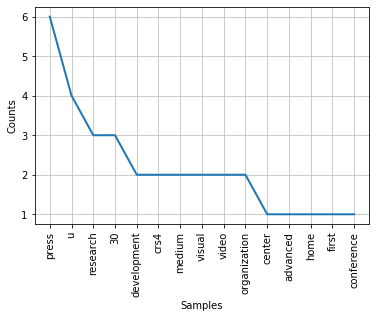

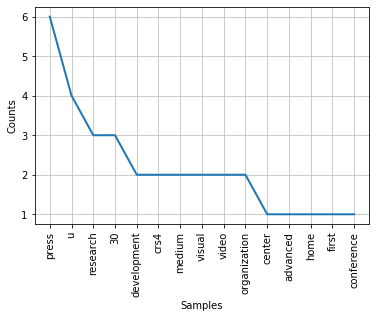

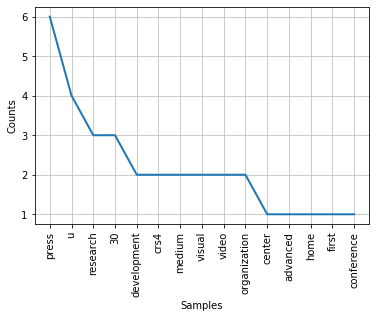

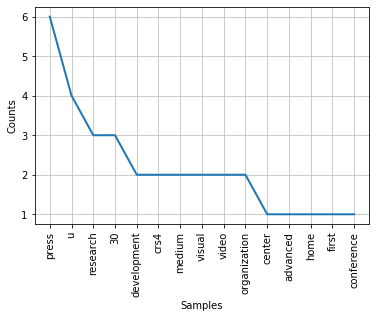

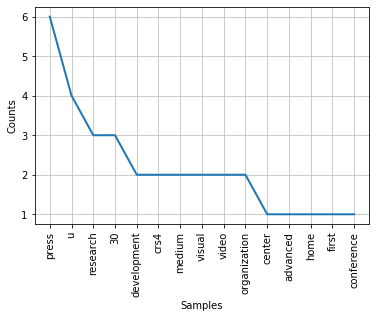

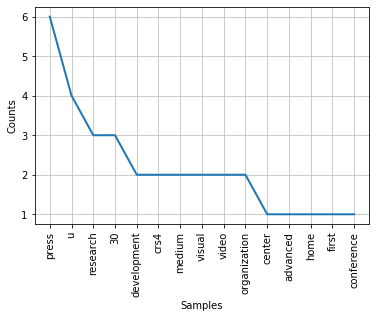

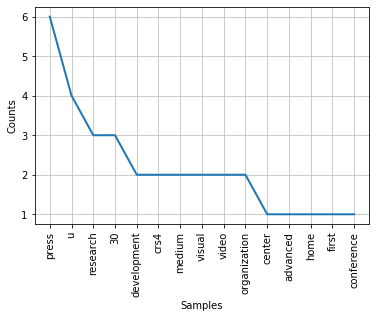

In [14]:
from nltk.probability import FreqDist

clean_texts=[]
for url in texts3[:]:
    clean = preprocessing(url)
    clean_texts.append(clean)
    
freq_word=[]
for url in clean_texts[:]:
    tokens=word_tokenize(url)
    fdist = FreqDist(tokens)
    #print(fdist.most_common(10))
    freq_word.append(fdist)
    
for url in freq_word[:]:
    url.plot(15,cumulative=False)
    plt.show()

In [15]:
#results = pd.DataFrame({'Title' : title, 'Freq_word' : freq_word}) 
#results

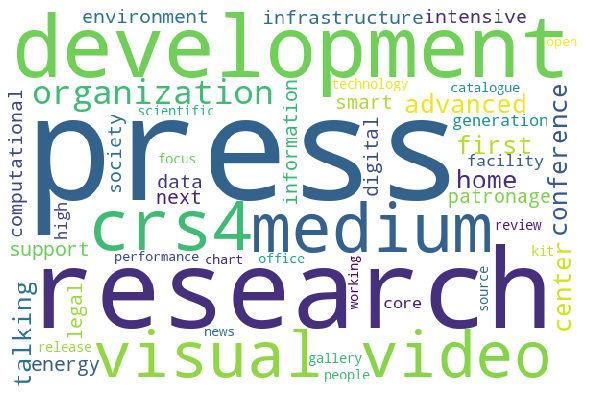

In [16]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(clean_texts[3]) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Parole frequenti sul totale

In [17]:
tot_text = ''.join(map(str, clean_texts))
type(tot_text)

str

In [18]:
tot_text=' '.join( [w for w in tot_text.split() if len(w)>1] )
tot_text = ''.join(i for i in tot_text if not i.isdigit())

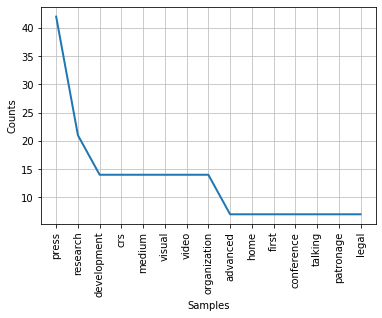

In [19]:
tokens=word_tokenize(tot_text)
fdist = FreqDist(tokens)

fdist.plot(15,cumulative=False)
plt.show()

**salvo la stringa contenente il contenuto di tutte le pagine del sito in un file a parte**

In [20]:
textfile = open('CRS4.txt', 'w')
textfile.write(tot_text)
textfile.close()

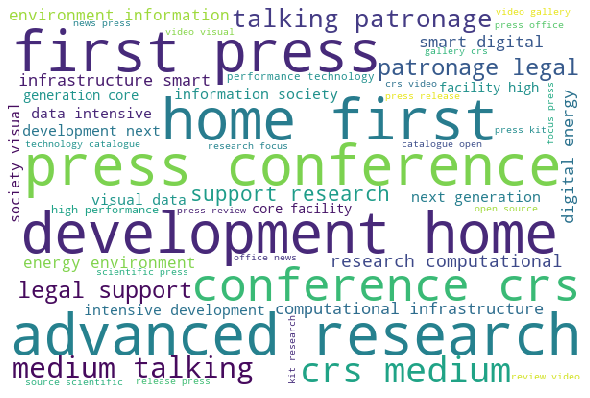

In [21]:
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(tot_text) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()